**Supervised**
- There are x columns and a target column y

**Unsupervised**
- only x columns 

Clustering-Divide the data in to groups(Clusters)

Euclidean Distance (d data1-data2)^2

**Other clustering algorithms**
- db scan clustering
- k mediod clustering
- hierarchical clustering
- K-prototype clustering

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
univ = pd.read_csv("universities.csv")
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [3]:
univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


- There are no null values in above data

In [4]:
univ.isnull()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [5]:
univ.isnull().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [6]:
univ.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


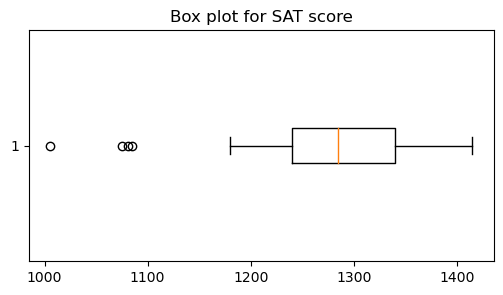

In [7]:
#boxplot for SAT score column

plt.figure(figsize=(6,3))
plt.title("Box plot for SAT score")
plt.boxplot(univ["SAT"], vert=False)
plt.show()

**Observations**
- There are some outliers are present in above SAT score

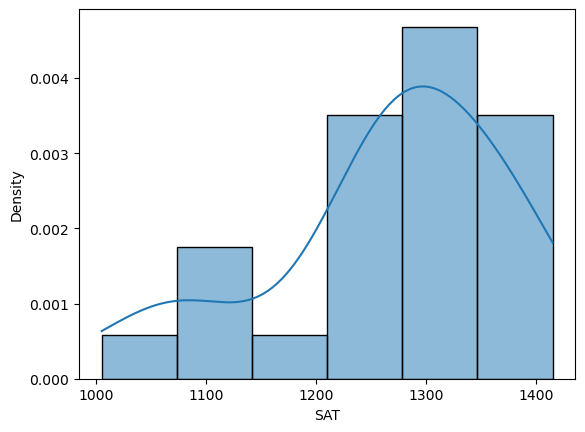

In [8]:
#hsitogram
sns.histplot(univ["SAT"], kde=True, stat='density')
plt.show()

**Observations**
- It is a left skewed 

In [20]:
#Read all numeric columns into univ1
univ1=univ.iloc[:,1:]

In [21]:
univ1

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,1310,89,22,13,22704,94,2
1,1415,100,25,6,63575,81,1
2,1260,62,59,9,25026,72,2
3,1310,76,24,12,31510,88,2
4,1280,83,33,13,21864,90,2
5,1340,89,23,10,32162,95,1
6,1315,90,30,12,31585,95,1
7,1255,74,24,12,20126,92,2
8,1400,91,14,11,39525,97,1
9,1305,75,44,7,58691,87,1


In [22]:
cols=univ1.columns
cols

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate',
       'clusterid_new'],
      dtype='object')

#### Standardization of the data

In [23]:
#standardisation function
#convert the all values into z score the values is in betwee -3 to 3
#normalization values lies between 0 to 1
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_univ_df=pd.DataFrame(scaler.fit_transform(univ1),columns = cols)
scaled_univ_df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303,0.927426
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524,-0.436436
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634,0.927426
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229,0.927426
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587,0.927426
5,0.692848,0.657519,-0.838130,-0.682530,0.337780,0.932982,-0.436436
6,0.457378,0.710037,-0.475975,-0.180670,0.296955,0.932982,-0.436436
7,-0.107751,-0.130243,-0.786394,-0.180670,-0.513817,0.594945,0.927426
8,1.257977,0.762555,-1.303758,-0.431600,0.858743,1.158339,-0.436436
9,0.363190,-0.077726,0.248335,-1.435321,2.214818,0.031550,-0.436436


In [33]:
#build 3 clusters using k means cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3,random_state=0)#specify 3 clusters
clusters_new.fit(scaled_univ_df)

KMeans(n_clusters=3, random_state=0)

In [34]:
#print thr clusters labels
clusters_new.labels_

array([2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2,
       2, 0, 1])

In [35]:
set(clusters_new.labels_)

{0, 1, 2}

In [36]:
#assign clusters to the univ dataset
univ['clusterid_new'] = clusters_new.labels_

In [37]:
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,1
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,1
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,1


In [38]:
univ.sort_values(by='clusterid_new')

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
17,TexasA&M,1075,49,67,25,8704,67,0
15,Purdue,1005,28,90,19,9066,69,0
13,PennState,1081,38,54,18,10185,80,0
23,UWisconsin,1085,40,69,15,11857,71,0
14,Princeton,1375,91,14,8,30220,95,1
10,MIT,1380,94,30,10,34870,91,1
9,JohnsHopkins,1305,75,44,7,58691,87,1
16,Stanford,1360,90,20,12,36450,93,1
24,Yale,1375,95,19,11,43514,96,1
6,Duke,1315,90,30,12,31585,95,1


In [39]:
univ.iloc[:,1:].groupby('clusterid_new').mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clusterid_new,,,,,,
0,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
1,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
2,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333


## Observations
- Cluster 1 apperas to be the top rated universities cluster as the cut off score,Top 10,SF ratio,parameter mean values are highest
- Cluster 2 occupies the middle level rated universities.
- Cluster 0 comes as the lower level rated universities.

### Finding optimal k value using elbow plot

[175.0, 77.45441933378858, 44.53176173145096, 34.794950572409746, 26.45525084643788, 22.22652319784355, 18.646505719292527, 15.931689715259928, 13.267235048457904, 10.76949236850812, 8.28958293205713, 7.114306030131724, 5.493016111483617, 4.472950168710963, 3.5227898079007445, 2.785374382514716, 2.1701629541141827, 1.5925725147407326, 1.1758698663599076]


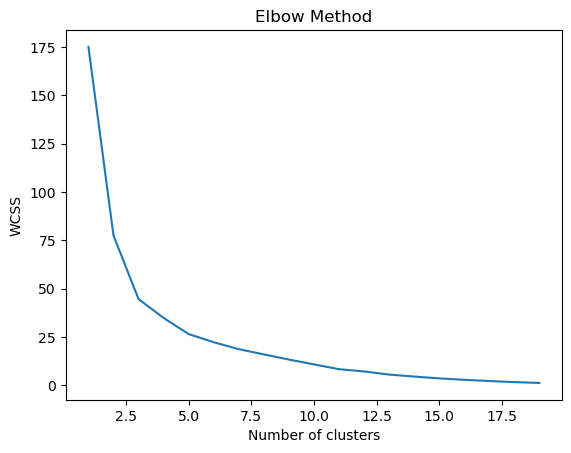

In [44]:
wcss=[]#within clusters sum of variance
for i in range(1,20):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_univ_df)
    wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1,20),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- From the above graphh we can choose k = 4 or 5 which indicates elbow joint i.e., the rate of change of slope decreses